In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import gmean


In [6]:
# density function
def triDensity(x):
    if x < 1/2:
        return 2*x
    if x >= 1/2:
        return -2*x +  2

#y simulator
def getY(x):
    prob1 = triDensity(x)
    randomNumber = np.random.uniform(0,1)
    if randomNumber>=prob1:
        return -1
    if randomNumber < prob1:
        return 1

In [7]:
x = np.random.uniform(0,1,300)
y = [getY(point) for point in x]

In [8]:
two_n_lambda_range = [2**-i for i in range(1, 24 + 1)]
gamma_range = [2**i for i in range(-12, 12 + 1)]
param_grid = [
    {'C': two_n_lambda_range}
    ]

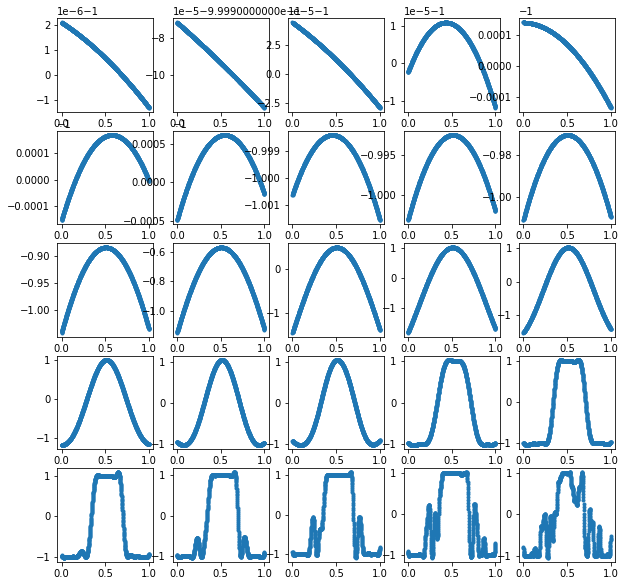

In [13]:
#standard
xGrid = np.linspace(0,1,1000).reshape(-1,1)
fig, axes = plt.subplots(5,5, figsize = (10,10))
for i in range(5):
    for j in range(5):
        gamma_now = gamma_range[5*i + j]
        ax = axes[i,j]

        gs = GridSearchCV(
            estimator = SVC(random_state=1, gamma = gamma_now),
            param_grid=param_grid,
            scoring=gmean.gmeanScorer,
            n_jobs = -1, refit = True)
        gs.fit(x.reshape(-1,1), y)
        yGrid = gs.best_estimator_.decision_function(xGrid)
        ax.plot(xGrid, yGrid, '.')
plt.show()

In [1]:
#2d
def triDensity2d(x1, x2):
    #return (1 - np.abs(1 - 2*x1)) * (1 - np.abs(1 - 2*x2))
def getY2d(x1, x2):
    prob1 = triDensity2d(x1, x2)
    randomNumber = np.random.uniform(0,1)
    if randomNumber>=prob1:
        return -1
    if randomNumber < prob1:
        return 1

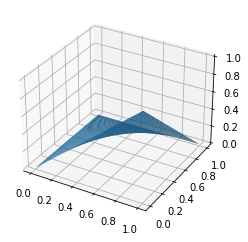

In [12]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')

x1Grid, x2Grid = np.meshgrid(np.linspace(0,1,200), np.linspace(0,1,200))
yGrid = triDensity2d(x1Grid,x2Grid)

#yGrid = np.array([triDensity2d(x1, x2) for (x1,x2) in zip(x1GridGrid,x2GridGrid)])
ax.plot_surface(x1Grid, x2Grid, yGrid)


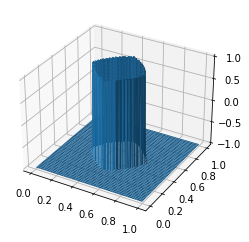

In [7]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')

x1Grid, x2Grid = np.meshgrid(np.linspace(0,1,200), np.linspace(0,1,200))
yGrid = np.sign(triDensity2d(x1Grid,x2Grid) - 1/2)

#yGrid = np.array([triDensity2d(x1, x2) for (x1,x2) in zip(x1GridGrid,x2GridGrid)])
ax.plot_surface(x1Grid, x2Grid, yGrid)


In [6]:
#samples
#2d 
x1 = np.random.uniform(0,1,1000)
x2 = np.random.uniform(0,1,1000)
x = np.c_[x1,x2]
y = [getY2d(x1, x2) for (x1,x2) in zip(x1,x2)]

fig, ax = plt.subplots(1,1, figsize = (6,6))
ax.scatter(x1, x2, c = y)
plt.show()

np.unique(y, return_counts = True)



NameError: name 'getY2d' is not defined

In [60]:
#nonstandard
x1Grid, x2Grid = np.meshgrid(np.linspace(0,1,200), np.linspace(0,1,200))
xGrid = np.c_[x1Grid.ravel(), x2Grid.ravel()]

fig = plt.figure(figsize = (10,10))

two_n_lambda_range = [2**-i for i in range(1, 24 + 1)]
gamma_range = np.array([[2**i + j * (1/5) for j in range(5)] for i in range(5, 10 + 1)]).ravel()
param_grid = [
    {'C': two_n_lambda_range}
    ]

for i in range(5):
    for j in range(5):
        gamma_now = gamma_range[5*i + j]
        ax = fig.add_subplot(5, 5, 5*i + j + 1, projection='3d')

        gs = GridSearchCV(
            estimator = SVC(random_state=1, gamma = gamma_now),
            param_grid=param_grid,
            scoring='accuracy',
            n_jobs = -1, refit = True)
        gs.fit(x, y)
        print(gs.best_params_)
        print(gs.best_score_)
        yGrid = gs.best_estimator_.decision_function(xGrid)
        ax.plot_surface(x1Grid, x2Grid, yGrid.reshape(200,200))
plt.show()

_status_ = libsvm.fit(
  File "sklearn/svm/_libsvm.pyx", line 60, in sklearn.svm._libsvm.fit
TypeError: must be real number, not list

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/jmmoon/work/gswsvm/gswsvm/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jmmoon/work/gswsvm/gswsvm/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/jmmoon/work/gswsvm/gswsvm/lib/python3.8/site-packages/sklearn/svm/_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/home/jmmoon/work/gswsvm/gswsvm/lib/python3.8/site-packages/sklearn/svm/_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
 

TypeError: must be real number, not list

In [54]:
a = np.array([1,2,3,4,5,6,7,8,9]).reshape(3,3)

In [5]:
import numpy as np
gamma_range = np.array([[2**(i + j * (1/5)) for j in range(5)] for i in range(5, 8 + 1)]).ravel()
gamma_range

array([ 32.        ,  36.75834736,  42.22425314,  48.50293013,
        55.71523605,  64.        ,  73.51669472,  84.44850629,
        97.00586026, 111.4304721 , 128.        , 147.03338944,
       168.89701258, 194.01172051, 222.8609442 , 256.        ,
       294.06677888, 337.79402516, 388.02344103, 445.72188841])

In [103]:
x1Min = np.min(X[:,0])
x1Max = np.max(X[:,0])
x2Min = np.min(X[:,1])
x2Max = np.max(X[:,1])
xx, yy = np.meshgrid(
	np.linspace(x1Min, x1Max, 500),
	np.linspace(x2Min, x2Max, 500)
)

NameError: name 'X' is not defined

In [48]:
1/((0.09)**2)

123.4567901234568